In [1]:
import pickle
# import plotly#
# import plotly.graph_objs as go#
import numpy as np
import matplotlib.pyplot as plt

In [2]:
genome_id = '220668.9'
file_name = "../metabolic_output/%s.data" % (genome_id)
total_dataset_dict = pickle.load(open(file_name, "rb"))

In [3]:
# total_dataset_dict

In [4]:
total_dataset_dict['220668.9:20.0.18']

{'Carbon': ['Maltohexaose', 'cpd01329'],
 'Model_ID': '220668.9',
 'Nitrogen': ['NH3', 'cpd00013'],
 'active_rxns':                     fluxes
 rxn08934_c      166.666667
 rxn00179_c      666.666667
 rxn02374_c      666.666667
 rxn05319_c      166.666667
 rxn00612_c      333.333333
 rxn05571_c    -1000.000000
 rxn05466_c      666.666667
 rxn01132_c      166.666667
 rxn01967_c      333.333333
 rxn00606_c     -166.666667
 rxn00611_c     -333.333333
 rxn05746_c      166.666667
 rxn10042_c      500.000000
 rxn08935_c      166.666667
 rxn00184_c     -666.666667
 rxn01476_c     1000.000000
 rxn04020_c      166.666667
 rxn08933_c      166.666667
 rxn05493_c     -333.333333
 rxn00216_c      666.666667
 rxn01275_c    -1000.000000
 rxn01975_c      333.333333
 rxn02373_c      666.666667
 rxn00929_c     -666.666667
 rxn00604_c      666.666667
 rxn05467_c    -1000.000000
 EX_cpd00067_e  -666.666667
 EX_cpd00001_e   166.666667
 EX_cpd00222_e  1000.000000
 EX_cpd00013_e  -666.666667
 EX_cpd00024_e   

In [9]:
whole_path_avg = []
gap_avg = []
orig_rxn_avg = []
num_gaps_filled = []
num_mets_added = []
num_rxn_w_flux = []
num_demands = []

for carb_ind in list(range(0,32)):
    for prod_ind in list(range(0,35)):
        ID = str(genome_id + ':' + str(carb_ind) + '.0.' + str(prod_ind))
        whole_path_avg.append(total_dataset_dict[ID]['whole_path_like'])
        gap_avg.append(total_dataset_dict[ID]['gap_avg_like'])
        orig_rxn_avg.append(total_dataset_dict[ID]['path_avg_like'])
        num_gaps_filled.append(len(total_dataset_dict[ID]['gaps_filled']))
        num_mets_added.append(len(total_dataset_dict[ID]['mets_added']))
        num_rxn_w_flux.append(len(total_dataset_dict[ID]['reactions_w_flux']))
        num_demands.append(len(total_dataset_dict[ID]['demands']))


In [14]:
# Which conditions result in: nan?
for carb_ind in list(range(0,32)):
    for prod_ind in list(range(0,35)):
        ID = str(genome_id + ':' + str(carb_ind) + '.0.' + str(prod_ind))
        try:
            round(total_dataset_dict[ID]['whole_path_like'], 3)
            if np.isnan(total_dataset_dict[ID]['whole_path_like']):
                print('nan: ' + ID)
            elif total_dataset_dict[ID]['opt_after'] < 1.0:
                print('zero: ' + ID)
        except:
            print(ID)
            pass


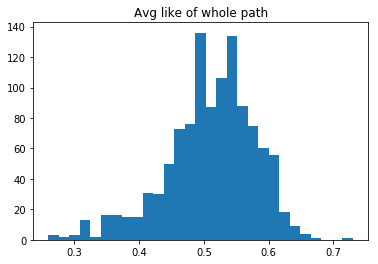

In [18]:
whole_path_avg_new = []
for i in whole_path_avg:
    try:
        i_new = round(i, 3)
        if ~np.isnan(i):
            whole_path_avg_new.append(i_new)
    except:
#         print(i)
        pass

plt.hist(whole_path_avg_new, bins='auto')  #
plt.title("Avg like of whole path")
plt.show()

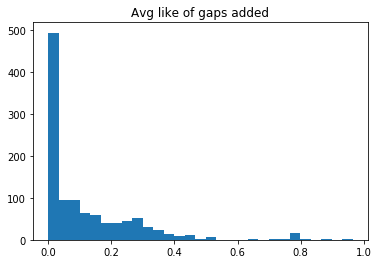

In [19]:
gap_avg_new = []
for i in gap_avg:
    try:
        i_new = round(i, 3)
        if ~np.isnan(i):
            gap_avg_new.append(i_new)
    except:
#         print(i)
        pass

plt.hist(gap_avg_new, bins='auto')  #
plt.title("Avg like of gaps added")
plt.show()

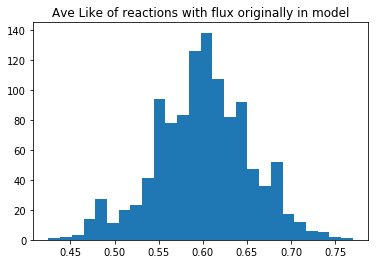

In [20]:
orig_rxn_avg_new = []
for i in orig_rxn_avg:
    try:
        i_new = round(i, 3)
        if ~np.isnan(i):
            orig_rxn_avg_new.append(i_new)
    except:
#         print(i)
        pass

plt.hist(orig_rxn_avg_new, bins='auto')  #
plt.title("Ave Like of reactions with flux originally in model")
plt.show()

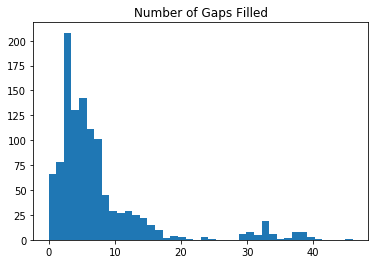

In [21]:
plt.hist(num_gaps_filled, bins='auto')  #
plt.title("Number of Gaps Filled")
plt.show()

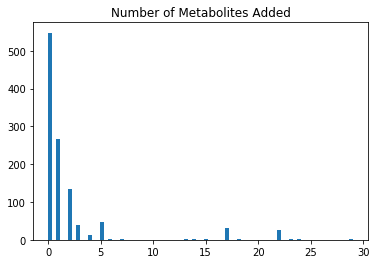

In [22]:
plt.hist(num_mets_added, bins='auto')  #
plt.title("Number of Metabolites Added")
plt.show()

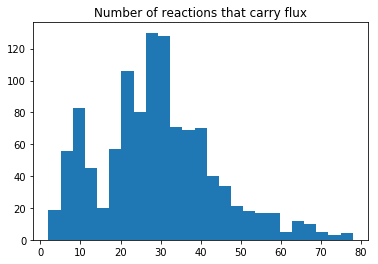

In [23]:
plt.hist(num_rxn_w_flux, bins='auto')  #
plt.title("Number of reactions that carry flux")
plt.show()

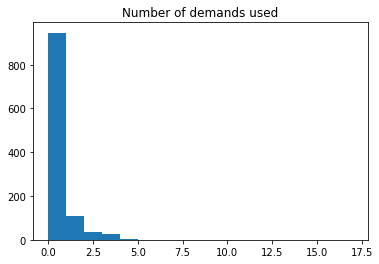

In [24]:
plt.hist(num_demands, bins=list(range(0,18)))  #
plt.title("Number of demands used")
plt.show()

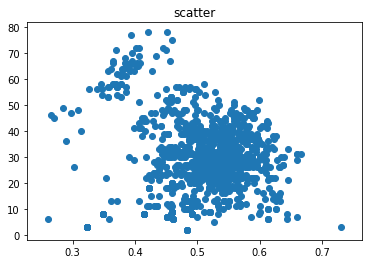

In [25]:
# Scatter of 
whole_path_avg_new = []
skipped = []
index = -1
for i in whole_path_avg:
    index += 1
    try:
        i_new = round(i, 3)
        if np.isnan(i):
            skipped.append(index)
        elif ~np.isnan(i):
            whole_path_avg_new.append(i_new)
    except:
        skipped.append(index)
        pass

num_rxn_w_flux_new = []
index = -1
for i in num_rxn_w_flux:
    index += 1
    if index not in skipped:
        num_rxn_w_flux_new.append(i)

plt.scatter(whole_path_avg_new, num_rxn_w_flux_new)  #
plt.title("scatter")
plt.show()


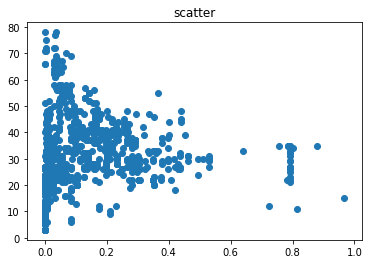

In [26]:
# Scatter of 

gap_avg_new = []
skipped = []
index = -1
for i in gap_avg:
    index += 1
    try:
        i_new = round(i, 3)
        if np.isnan(i):
            skipped.append(index)
        elif ~np.isnan(i):
            gap_avg_new.append(i_new)
    except:
        skipped.append(index)
        pass

num_rxn_w_flux_new = []
index = -1
for i in num_rxn_w_flux:
    index += 1
    if index not in skipped:
        num_rxn_w_flux_new.append(i)

plt.scatter(gap_avg_new, num_rxn_w_flux_new)  #
plt.title("scatter")
plt.show()

In [27]:
print(len(gap_avg_new))
print(len(whole_path_avg_new))

1101
1120


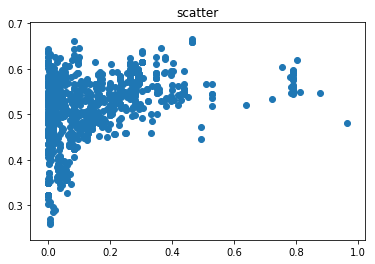

In [28]:
gap_avg_new = []
skipped = []
index = -1
for i in gap_avg:
    index += 1
    try:
        i_new = round(i, 3)
        if np.isnan(i):
            skipped.append(index)
        elif ~np.isnan(i):
            gap_avg_new.append(i_new)
    except:
        skipped.append(index)
        pass

whole_path_avg_new = []
index = -1
for i in whole_path_avg:
    index += 1
    if index not in skipped:
        whole_path_avg_new.append(i)

plt.scatter(gap_avg_new, whole_path_avg_new)  #
plt.title("scatter")
plt.show()

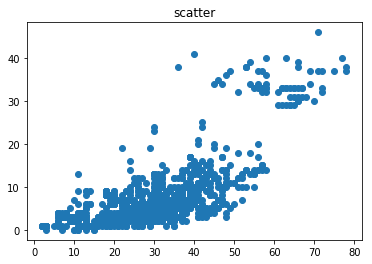

In [29]:
plt.scatter(num_rxn_w_flux, num_gaps_filled)  #
plt.title("scatter")
plt.show()

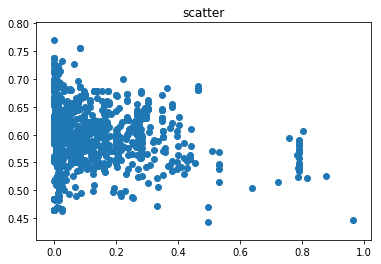

In [30]:
gap_avg_new = []
skipped = []
index = -1
for i in gap_avg:
    index += 1
    try:
        i_new = round(i, 3)
        if np.isnan(i):
            skipped.append(index)
        elif ~np.isnan(i):
            gap_avg_new.append(i_new)
    except:
        skipped.append(index)
        pass

orig_rxn_avg_new = []
index = -1
for i in orig_rxn_avg:
    index += 1
    if index not in skipped:
        orig_rxn_avg_new.append(i)

plt.scatter(gap_avg_new, orig_rxn_avg_new)  #
plt.title("scatter")
plt.show()

In [31]:
def makeShared(models, output_file):
    
    rxns = set()
    
    for index in models:
        rxns |= set([x.id for x in index.reactions])
    
    rxns = list(rxns)
    
    rxn_file = open(rxn_file, 'w')
    header = 'model\t' + '\t'.join(rxns) + '\n'
    rxn_file.write(header)
    
    for index in models:
        rxn_file.write(str(index) + '\t')
        cpd_file.write(str(index) + '\t')
        exch_file.write(str(index) + '\t')
        
        curr_rxn = set([x.id for x in index.reactions])
        curr_cpd = set([x.id for x in index.metabolites])
        curr_ex = set([x.id for x in index.exchanges])
        
        for x in rxns:
            if x in x in curr_rxn:
                rxn_file.write('1')
            else:
                rxn_file.write('0')
            if x != rxns[-1]:
                rxn_file.write('\t')
        rxn_file.write('\n')
    
    rxn_file.close()

In [ ]:
makeShared(models, '../metabolic_output/rxn_file.tsv')